# Waveform plot 
This will download continuous seismic waveforms & plot them and requires ObsPy

## Import ObsPy module

In [11]:
from obspy import read
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

import obspy as ob
print("# obspy version = ",ob.__version__)

# obspy version =  1.2.2


## Set client (Data Center)
This example uses NCEDC. We can use other dataceneter (e.g., SCEDC, IRIS...)

In [12]:
client = Client("NCEDC") # data from NCEDC 
#client = Client("SCEDC") # data from SCEDC
#client = Client("IRIS") # data from IRIS

## Set SNCL
Which SNCL (Station, Network, Component, Location)? This example uses BKS.BK.HHZ.00 data

In [13]:
# BRK BHZ data (https://seismo.berkeley.edu/station_book/brk.html; Haviland Hal)
sta = "BRK" # station
com = "HHZ" # componnet 
net = "BK" # network
loc = "00" # location "--" for blank location code

## Set time window
This example uses 10-min data for the 2019 M7.1 Ridgecrest earthquake

In [14]:
# Alum Rock event
#M 3.1 - 8km NE of Alum Rock, CA
#2020-08-02 12:40:24 (UTC)37.409°N 121.755°W7.9 km depth
start_day = "2020-08-02T12:40:24"
end_day = "2020-08-02T12:41:24"
starttime = UTCDateTime(start_day)
endtime = UTCDateTime(end_day)

## Download seismic data
use get_waveforms to download data and do st.plot() for plotting 

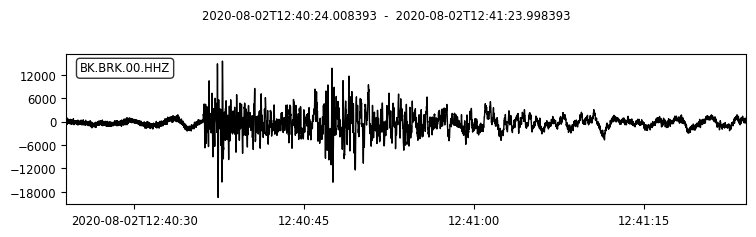

In [15]:
st = client.get_waveforms(network=net, station=sta, location=loc, channel=com,
                     starttime=starttime, endtime=endtime, 
                     attach_response=True)
_plot = st.plot()

## Correct instrument response
use remove_response to correct the instrument response. We can select output unit (displacement, velocity or accerelation)

In [16]:
st.detrend() # remove liner trend
st.detrend("demean") # demean
st.taper(0.05) # cosin taper

1 Trace(s) in Stream:
BK.BRK.00.HHZ | 2020-08-02T12:40:24.008393Z - 2020-08-02T12:41:23.998393Z | 100.0 Hz, 6000 samples

In [17]:
st = st.remove_response( output="VEL" , water_level=None) # get velocity data (m/s)
#st = st.remove_response( output="DISP" , water_level=None) # get displacement data (m)
#st = st.remove_response( output="ACC" ), water_level=None # get acceleration data (m/s^2)

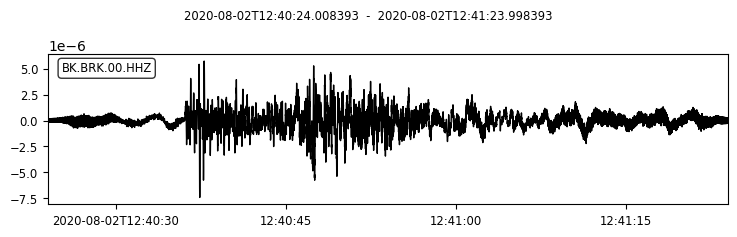

In [18]:
_plot = st.plot()

## Filtering seismic data
first remove liner trend, apply a cosin taper, and then do filtering

In [19]:
st.detrend() # remove liner trend
st.detrend("demean") # demean
st.taper(0.05) # cosin taper

fl = 5 # in Hz 
fh = 10 # in Hz
st.filter(type='bandpass', freqmin=fl, freqmax=fh, corners=6, zerophase=False)


1 Trace(s) in Stream:
BK.BRK.00.HHZ | 2020-08-02T12:40:24.008393Z - 2020-08-02T12:41:23.998393Z | 100.0 Hz, 6000 samples

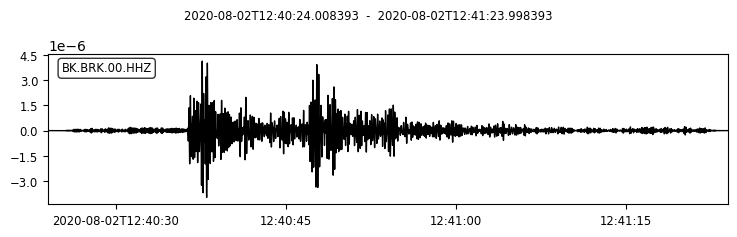

In [20]:
_plot = st.plot()